In [71]:
import pandas as pd
import numpy as np
from dtw import dtw
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [72]:
folder_dir='D:/Documentos/NYU_Projects/bigdata_data/citibike/weather-2011-2017.csv'

### Bike & weather data

In [73]:
data=pd.read_csv('bike_weather2.csv', header=0)
#data['date']=pd.to_datetime(data['day_x']).apply(lambda x: x.date())
data['date']=data['day_x'].astype(str)
data=data[['date','Temp','Spd','Prcp','mean_duration','num_trips']]

data.head()

,date,Temp,Spd,Prcp,mean_duration,num_trips
0,2011-01-01,3.250000,2.987500,0.0,NaN,NaN
1,2011-01-02,5.732353,2.255882,4.8,NaN,NaN
2,2011-01-03,1.200000,8.285714,5.8,NaN,NaN
3,2011-01-04,0.570833,4.116667,0.0,NaN,NaN
4,2011-01-05,1.620833,5.245833,0.0,NaN,NaN


### Crime

In [74]:
crime=pd.read_csv('crime_clean.csv')
crime['date']=crime['date'].astype(str).str.slice(0,10)
crime=crime.drop('Unnamed: 0',axis=1)
crime.head()

,date,felonies,misdemeanors,violations
0,2009-04-20,376,677,162
1,2008-11-25,467,849,151
2,2002-02-22,4,0,0
3,2007-08-28,466,864,198
4,2002-08-09,1,0,0


### 311 & Vehicle collisions

In [75]:
colls=pd.read_csv('311_vehcol_2.csv')
colls['date']=colls['Unnamed: 0']
colls=colls.drop('Unnamed: 0',axis=1)
colls['date']=pd.to_datetime(colls['date'], format='%Y-%m-%d').apply(lambda x: x.date())
#colls=colls.set_index('date')
#colls=colls.sort_index()
colls.head()

,Traffic Signal Condition,ELECTRIC,FLOORING/STAIRS,Sanitation Condition,Illegal Parking,Noise - Residential,Sewer,Noise - Commercial,Water System,Blocked Driveway,...,Derelict Vehicles,Dirty Conditions,Indoor Air Quality,QUEENS,BROOKLYN,BRONX,MANHATTAN,STATEN ISLAND,passenger_vehicle,date
0,60,83,104,67,67,544,35,55,945,153,...,9,72,7,101,135,39,119,26,588,2012-07-01
1,87,148,251,117,95,199,78,19,700,132,...,43,154,19,94,140,71,113,25,584,2012-07-02
2,112,125,214,122,102,215,108,29,558,121,...,30,148,21,136,167,73,150,22,690,2012-07-03
3,64,56,66,37,51,521,42,28,681,111,...,13,46,9,93,94,51,65,22,485,2012-07-04
4,98,186,260,113,106,262,75,20,1126,148,...,32,140,17,123,153,60,107,24,594,2012-07-05


### Taxi

In [76]:
taxi=pd.read_csv('taxis_2011_2016.csv')
taxi=taxi.drop('Unnamed: 0',axis=1)
taxi['date']=taxi['tripyear'].astype(str)+"-"+taxi['tripmonth'].astype(str)+'-'+taxi['tripday'].astype(str)
taxi['date']=pd.to_datetime(taxi['date'], format='%Y-%m-%d').apply(lambda x: x.date())
taxi=taxi.rename(columns={'count':'taxi_count'})
taxi=taxi[['date','taxi_count']]
taxi.head()

,date,taxi_count
0,2011-01-01,183030
1,2011-01-02,158706
2,2011-01-03,374927
3,2011-01-04,407012
4,2011-01-05,439070


In [77]:
result=crime.merge(data,how='left',on='date')
result['year']=result['date'].str.slice(0,4)
result=result[result.year!='nan']
result=result.dropna(subset=['year'])

result['year']=result['year'].astype(int)
result=result[(result['year']>=2011)&(result['year']<=2017)]

result['date']=pd.to_datetime(result['date'], format='%Y-%m-%d').apply(lambda x: x.date())
result=result.drop('year',axis=1)
result=result.merge(colls,how='left',on='date')
result=result.merge(taxi,how='left',on='date')

result=result.set_index('date')
result=result.sort_index()

result.head()

,felonies,misdemeanors,violations,Temp,Spd,Prcp,mean_duration,num_trips,Traffic Signal Condition,ELECTRIC,...,Derelict Vehicles,Dirty Conditions,Indoor Air Quality,QUEENS,BROOKLYN,BRONX,MANHATTAN,STATEN ISLAND,passenger_vehicle,taxi_count
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,729,1347,202,3.250000,2.987500,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183030.0
2011-01-02,302,560,134,5.732353,2.255882,4.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158706.0
2011-01-03,352,633,153,1.200000,8.285714,5.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374927.0
2011-01-04,388,747,166,0.570833,4.116667,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407012.0
2011-01-05,396,801,167,1.620833,5.245833,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439070.0


# Correlations

In [78]:
result.shape

(2192, 38)

In [79]:
result=result.dropna()
result.shape

(998, 38)

In [80]:
result=result.dropna()
result.to_csv('final_data.csv')
result.head()

,felonies,misdemeanors,violations,Temp,Spd,Prcp,mean_duration,num_trips,Traffic Signal Condition,ELECTRIC,...,Derelict Vehicles,Dirty Conditions,Indoor Air Quality,QUEENS,BROOKLYN,BRONX,MANHATTAN,STATEN ISLAND,passenger_vehicle,taxi_count
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,511,842,186,22.834211,4.992105,58.8,978.599279,16650.0,122.0,147.0,...,44.0,128.0,11.0,112.0,165.0,58.0,134.0,20.0,608.0,422480.0
2013-07-02,422,821,152,23.210345,5.800000,1.6,958.129567,22745.0,141.0,144.0,...,48.0,170.0,17.0,116.0,149.0,53.0,116.0,21.0,575.0,442300.0
2013-07-03,450,809,162,23.536364,4.724242,27.1,974.328485,21864.0,126.0,146.0,...,20.0,148.0,12.0,110.0,150.0,53.0,123.0,16.0,600.0,435265.0
2013-07-04,417,832,161,24.679310,4.282759,6.3,1273.108439,22326.0,63.0,65.0,...,20.0,45.0,7.0,87.0,107.0,57.0,65.0,17.0,433.0,326471.0
2013-07-05,474,876,174,25.992000,4.804000,0.0,1082.426609,21842.0,99.0,110.0,...,35.0,83.0,10.0,113.0,139.0,72.0,103.0,20.0,574.0,353054.0


In [81]:
lcrime=['felonies','misdemeanors','violations']
lweather=['Temp','Spd','Prcp']
lbike=['mean_duration','num_trips']
lcolls= ['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND','passenger_vehicle']
l311=['Traffic Signal Condition', 'ELECTRIC', 'FLOORING/STAIRS',
       'Sanitation Condition', 'Illegal Parking', 'Noise - Residential',
       'Sewer', 'Noise - Commercial', 'Water System', 'Blocked Driveway',
       'Taxi Complaint', 'Sidewalk Condition', 'For Hire Vehicle Complaint',
       'Found Property', 'Noise', 'Street Light Condition', 'PLUMBING',
       'Street Sign - Damaged', 'Damaged Tree', 'Rodent', 'Derelict Vehicles',
       'Dirty Conditions', 'Indoor Air Quality']
data_all=[lcrime,lweather,lbike,lcolls]
crime=0
taxi=0
colls=0
data=0

In [82]:
mycolumns=result.columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
result=pd.DataFrame(scaler.fit_transform(result),columns=mycolumns)
result.head()

,felonies,misdemeanors,violations,Temp,Spd,Prcp,mean_duration,num_trips,Traffic Signal Condition,ELECTRIC,...,Derelict Vehicles,Dirty Conditions,Indoor Air Quality,QUEENS,BROOKLYN,BRONX,MANHATTAN,STATEN ISLAND,passenger_vehicle,taxi_count
0,0.656566,0.422245,0.555556,0.809771,0.338186,0.218263,0.095156,0.235665,0.177007,0.758427,...,0.277419,0.156992,0.294118,0.412766,0.627615,0.280702,0.615385,0.339286,0.387203,0.653700
1,0.431818,0.400618,0.333333,0.818347,0.414092,0.005939,0.090392,0.326725,0.211679,0.741573,...,0.303226,0.212401,0.470588,0.429787,0.560669,0.251462,0.523077,0.357143,0.360131,0.698841
2,0.502525,0.388260,0.398693,0.825781,0.313019,0.100594,0.094162,0.313563,0.184307,0.752809,...,0.122581,0.183377,0.323529,0.404255,0.564854,0.251462,0.558974,0.267857,0.380640,0.682818
3,0.419192,0.411946,0.392157,0.851841,0.271539,0.023385,0.163697,0.320465,0.069343,0.297753,...,0.122581,0.047493,0.176471,0.306383,0.384937,0.274854,0.261538,0.285714,0.243642,0.435035
4,0.563131,0.457261,0.477124,0.881771,0.320513,0.000000,0.119320,0.313234,0.135036,0.550562,...,0.219355,0.097625,0.264706,0.417021,0.518828,0.362573,0.456410,0.339286,0.359311,0.495579


In [83]:
def correlation_dtw(x_col, y_col):
    x=np.array(result[x_col]).reshape(-1, 1)
    y=np.array(result[y_col]).reshape(-1, 1)
    dist, cost, acc, path = dtw(x, y, 
                                lambda x, y: np.linalg.norm(x - y, ord=2))
   
    return dist
   

In [26]:
allcolumns=result.columns
corrs={}
run=[]
i=0
for c1 in allcolumns:
    for c2 in allcolumns:
        vars_=sorted([c1,c2])

        
        if (c1 in lcrime) and (c2 in lcrime):
            pass
        elif c1 in lweather and c2 in lweather:
            pass
        elif c1 in lbike and c2 in lbike:
            pass
        elif c1 in lcolls and c2 in lcolls:
            pass
        elif c1 in l311 and c2 in l311:
            pass
        
        elif sorted([c1,c2]) in run:
            pass
        else:
            run.append(vars_)
            
run

[['Temp', 'felonies'],
 ['Spd', 'felonies'],
 ['Prcp', 'felonies'],
 ['felonies', 'mean_duration'],
 ['felonies', 'num_trips'],
 ['Traffic Signal Condition', 'felonies'],
 ['ELECTRIC', 'felonies'],
 ['FLOORING/STAIRS', 'felonies'],
 ['Sanitation Condition', 'felonies'],
 ['Illegal Parking', 'felonies'],
 ['Noise - Residential', 'felonies'],
 ['Sewer', 'felonies'],
 ['Noise - Commercial', 'felonies'],
 ['Water System', 'felonies'],
 ['Blocked Driveway', 'felonies'],
 ['Taxi Complaint', 'felonies'],
 ['Sidewalk Condition', 'felonies'],
 ['For Hire Vehicle Complaint', 'felonies'],
 ['Found Property', 'felonies'],
 ['Noise', 'felonies'],
 ['Street Light Condition', 'felonies'],
 ['PLUMBING', 'felonies'],
 ['Street Sign - Damaged', 'felonies'],
 ['Damaged Tree', 'felonies'],
 ['Rodent', 'felonies'],
 ['Derelict Vehicles', 'felonies'],
 ['Dirty Conditions', 'felonies'],
 ['Indoor Air Quality', 'felonies'],
 ['QUEENS', 'felonies'],
 ['BROOKLYN', 'felonies'],
 ['BRONX', 'felonies'],
 ['MANHATT

In [27]:
len(run)

391

In [33]:
new_run = run[:150]
new_run

[['Temp', 'felonies'],
 ['Spd', 'felonies'],
 ['Prcp', 'felonies'],
 ['felonies', 'mean_duration'],
 ['felonies', 'num_trips'],
 ['Traffic Signal Condition', 'felonies'],
 ['ELECTRIC', 'felonies'],
 ['FLOORING/STAIRS', 'felonies'],
 ['Sanitation Condition', 'felonies'],
 ['Illegal Parking', 'felonies'],
 ['Noise - Residential', 'felonies'],
 ['Sewer', 'felonies'],
 ['Noise - Commercial', 'felonies'],
 ['Water System', 'felonies'],
 ['Blocked Driveway', 'felonies'],
 ['Taxi Complaint', 'felonies'],
 ['Sidewalk Condition', 'felonies'],
 ['For Hire Vehicle Complaint', 'felonies'],
 ['Found Property', 'felonies'],
 ['Noise', 'felonies'],
 ['Street Light Condition', 'felonies'],
 ['PLUMBING', 'felonies'],
 ['Street Sign - Damaged', 'felonies'],
 ['Damaged Tree', 'felonies'],
 ['Rodent', 'felonies'],
 ['Derelict Vehicles', 'felonies'],
 ['Dirty Conditions', 'felonies'],
 ['Indoor Air Quality', 'felonies'],
 ['QUEENS', 'felonies'],
 ['BROOKLYN', 'felonies'],
 ['BRONX', 'felonies'],
 ['MANHATT

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

{'BRONX_taxi_count': 0.070855848982019506,
 'BROOKLYN_taxi_count': 0.050980157489627621,
 'Blocked Driveway_BRONX': 0.058208683144483284,
 'Blocked Driveway_BROOKLYN': 0.054664286794663688,
 'Blocked Driveway_MANHATTAN': 0.055290829700182606,
 'Blocked Driveway_QUEENS': 0.05205470604065638,
 'Blocked Driveway_STATEN ISLAND': 0.052798209815136679,
 'Blocked Driveway_passenger_vehicle': 0.045151700225693689,
 'Blocked Driveway_taxi_count': 0.061833340571038439,
 'Damaged Tree_BRONX': 0.048724047631579094,
 'Damaged Tree_BROOKLYN': 0.11172095124863886,
 'Damaged Tree_MANHATTAN': 0.1018379955176627,
 'Damaged Tree_QUEENS': 0.095664702185436226,
 'Damaged Tree_STATEN ISLAND': 0.06370954080604134,
 'Damaged Tree_passenger_vehicle': 0.075719911895671038,
 'Damaged Tree_taxi_count': 0.10150038435232261,
 'Derelict Vehicles_BRONX': 0.04565061078580486,
 'Derelict Vehicles_BROOKLYN': 0.062701567259231497,
 'Derelict Vehicles_MANHATTAN': 0.065437077629203783,
 'Derelict Vehicles_QUEENS': 0.056924

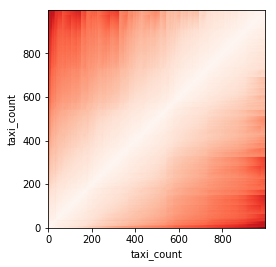

In [84]:
allcolumns=result.columns
corrs={}
run=[]
i=0
for c1 in allcolumns:
    for c2 in allcolumns:
        vars_=sorted([c1,c2])

        
        if (c1 in lcrime) and (c2 in lcrime):
            pass
        elif c1 in lweather and c2 in lweather:
            pass
        elif c1 in lbike and c2 in lbike:
            pass
        elif c1 in lcolls and c2 in lcolls:
            pass
        elif c1 in l311 and c2 in l311:
            pass
        
        elif sorted([c1,c2]) in run:
            pass
        else:
            run.append(vars_)
            
            dist=correlation_dtw(x_col= c1, y_col =c2)
            name=c1+'_'+c2
            corrs[name]=dist
            if i%10==0:
                print(i)
            i+=1
corrs

In [85]:
corrs

{'BRONX_taxi_count': 0.070855848982019506,
 'BROOKLYN_taxi_count': 0.050980157489627621,
 'Blocked Driveway_BRONX': 0.058208683144483284,
 'Blocked Driveway_BROOKLYN': 0.054664286794663688,
 'Blocked Driveway_MANHATTAN': 0.055290829700182606,
 'Blocked Driveway_QUEENS': 0.05205470604065638,
 'Blocked Driveway_STATEN ISLAND': 0.052798209815136679,
 'Blocked Driveway_passenger_vehicle': 0.045151700225693689,
 'Blocked Driveway_taxi_count': 0.061833340571038439,
 'Damaged Tree_BRONX': 0.048724047631579094,
 'Damaged Tree_BROOKLYN': 0.11172095124863886,
 'Damaged Tree_MANHATTAN': 0.1018379955176627,
 'Damaged Tree_QUEENS': 0.095664702185436226,
 'Damaged Tree_STATEN ISLAND': 0.06370954080604134,
 'Damaged Tree_passenger_vehicle': 0.075719911895671038,
 'Damaged Tree_taxi_count': 0.10150038435232261,
 'Derelict Vehicles_BRONX': 0.04565061078580486,
 'Derelict Vehicles_BROOKLYN': 0.062701567259231497,
 'Derelict Vehicles_MANHATTAN': 0.065437077629203783,
 'Derelict Vehicles_QUEENS': 0.056924

In [96]:
correlations=pd.DataFrame.from_dict(corrs,orient='index')


In [108]:
correlations.columns=['dtw']
correlations=correlations.sort_values(by='dtw',ascending=True)
correlations.to_csv('correlations_dtw.csv')
correlations.h

,dtw
taxi_count_taxi_count,0.000000
mean_duration_Damaged Tree,0.012510
mean_duration_Water System,0.013520
mean_duration_Street Sign - Damaged,0.014109
mean_duration_Dirty Conditions,0.014277
mean_duration_Sewer,0.015343
Prcp_Damaged Tree,0.022663
Prcp_Sewer,0.022820
Prcp_Street Sign - Damaged,0.023429
Prcp_mean_duration,0.024751


### Graph correlations

In [109]:
def correlation_dtw_graph(x_col, y_col):
    x=np.array(result[x_col]).reshape(-1, 1)
    y=np.array(result[y_col]).reshape(-1, 1)
    dist, cost, acc, path = dtw(x, y, 
                                lambda x, y: np.linalg.norm(x - y, ord=2))
   
    plt.figure(3)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    imshow(acc.T, origin='lower', cmap='Reds', interpolation='nearest')
    print(dist)
    plt.plot(path[0], path[1], 'w')
    plt.savefig(x_col+'_'+y_col+'.jpg')
    plt.show()

In [110]:
tograph=[['Prcp','Damaged Tree'],['Prcp','Sewer'],['Prcp','Water System'],
         ['Prcp','Street Sign - Damaged'],['mean_duration','Dirty Conditions'],
        ['mean_duration','Water System'],['Illegal Parking','passenger_vehicle'],
         ['misdemeanors','Found Property'],['violations','Noise']]

0.0226627358467


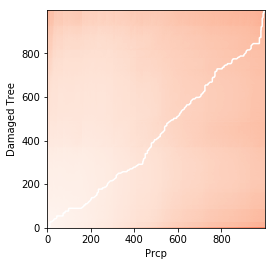

0.0228196916212


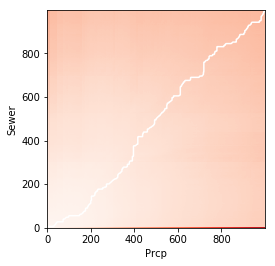

0.024955120727


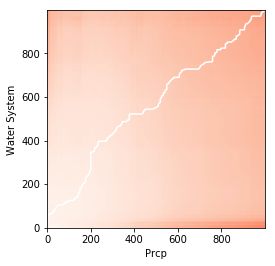

0.0234294101963


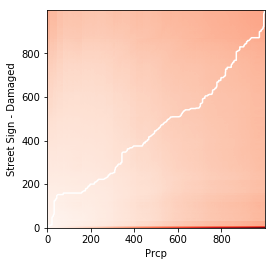

0.0142772203093


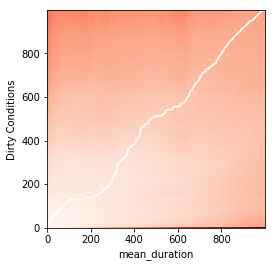

0.0135196172404


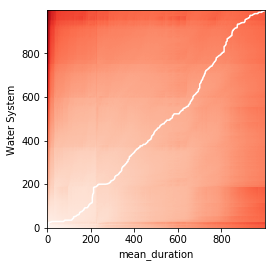

0.0403917374765


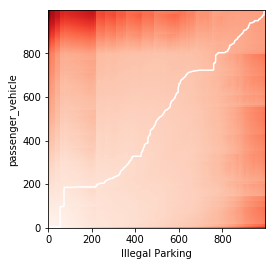

0.0415303298534


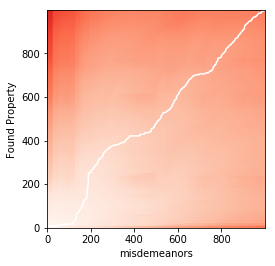

0.0455348556835


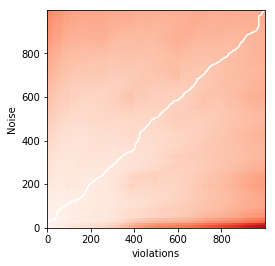

In [111]:
for m in tograph:
     correlation_dtw_graph(x_col=m[0], y_col=m[1])
    